<a href="https://colab.research.google.com/github/yashika123k/yashika123k/blob/main/DeepDataHack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_excel(r"/content/AQI_hourly_city_level_sohna_2023.xlsx")

In [10]:
df.head()

,Days,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,1,265,211.0,204.0,191,186.0,184.0,161.0,143,151.0,...,150.0,124.0,128,122.0,111.0,111.0,180.0,240,260.0,280.0
1,2,313,332.0,327.0,300,293.0,278.0,270.0,272,274.0,...,399.0,390.0,384,392.0,378.0,349.0,349.0,350,339.0,331.0
2,3,328,302.0,316.0,323,340.0,346.0,353.0,363,370.0,...,418.0,404.0,394,374.0,360.0,381.0,374.0,383,404.0,397.0
3,4,376,355.0,343.0,347,332.0,337.0,327.0,304,275.0,...,309.0,293.0,293,285.0,282.0,275.0,300.0,328,372.0,377.0
4,5,388,376.0,378.0,375,357.0,326.0,283.0,203,157.0,...,300.0,292.0,293,298.0,318.0,256.0,340.0,359,390.0,396.0


In [11]:
df.isnull().sum()

,0
Days,0
00:00:00,0
01:00:00,1
02:00:00,1
03:00:00,0
04:00:00,1
05:00:00,1
06:00:00,1
07:00:00,0
08:00:00,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      365 non-null    int64  
 1   00:00:00  365 non-null    int64  
 2   01:00:00  364 non-null    float64
 3   02:00:00  364 non-null    float64
 4   03:00:00  365 non-null    int64  
 5   04:00:00  364 non-null    float64
 6   05:00:00  364 non-null    float64
 7   06:00:00  364 non-null    float64
 8   07:00:00  365 non-null    int64  
 9   08:00:00  364 non-null    float64
 10  09:00:00  365 non-null    int64  
 11  10:00:00  364 non-null    float64
 12  11:00:00  365 non-null    int64  
 13  12:00:00  365 non-null    int64  
 14  13:00:00  364 non-null    float64
 15  14:00:00  363 non-null    float64
 16  15:00:00  362 non-null    float64
 17  16:00:00  365 non-null    int64  
 18  17:00:00  364 non-null    float64
 19  18:00:00  362 non-null    float64
 20  19:00:00  363 non-null    float6

In [14]:
df.describe()

,Days,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
count,365.000000,365.000000,364.000000,364.000000,365.000000,364.000000,364.000000,364.000000,365.000000,364.000000,...,363.000000,362.000000,365.000000,364.000000,362.000000,363.000000,364.000000,365.000000,364.000000,364.000000
mean,183.000000,216.369863,210.568681,205.791209,202.512329,197.010989,192.497253,188.497253,185.753425,187.461538,...,178.352617,174.204420,168.180822,161.447802,160.259669,166.567493,179.659341,197.638356,212.214286,216.324176
std,105.510663,98.232387,97.560030,97.522423,97.061343,94.485995,93.472245,93.740910,92.702819,92.955312,...,86.939346,85.295784,82.711037,77.226475,78.376914,81.592660,86.395716,93.113901,96.443896,98.438634
min,1.000000,37.000000,46.000000,43.000000,44.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,43.000000,49.000000,47.000000,44.000000,45.000000,48.000000,53.000000,49.000000,42.000000,32.000000
25%,92.000000,133.000000,128.000000,123.000000,120.000000,115.750000,114.000000,107.750000,106.000000,111.250000,...,105.000000,103.000000,103.000000,100.000000,102.000000,106.500000,111.750000,124.000000,135.000000,135.000000
50%,183.000000,209.000000,200.000000,192.500000,192.000000,187.000000,184.000000,175.500000,172.000000,170.000000,...,163.000000,154.000000,148.000000,141.500000,137.500000,141.000000,159.000000,178.000000,198.500000,206.000000
75%,274.000000,290.000000,286.000000,272.500000,272.000000,267.000000,260.000000,261.000000,255.000000,262.000000,...,238.500000,231.000000,217.000000,203.500000,201.750000,217.000000,235.250000,257.000000,273.500000,283.250000
max,365.000000,464.000000,447.000000,455.000000,490.000000,467.000000,458.000000,426.000000,426.000000,419.000000,...,500.000000,490.000000,459.000000,439.000000,474.000000,475.000000,485.000000,484.000000,484.000000,487.000000


####**PREPROCESSING OF DATA**

In [19]:
df.replace('NA',np.nan,inplace=True)
df.fillna(method='ffill',inplace=True)

<ipython-input-19-4b9cda796186>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


In [20]:
# Reshape the data into a single time-series (flatten 365 days * 24 hours)
aqi_values = []
for day in range(1, 366):
    for hour in df.columns[1:]:  # Skip 'Days' column
        aqi_values.append(df.loc[df['Days'] == day, hour].values[0])

In [21]:
# Convert to numpy array
aqi_series = np.array(aqi_values)

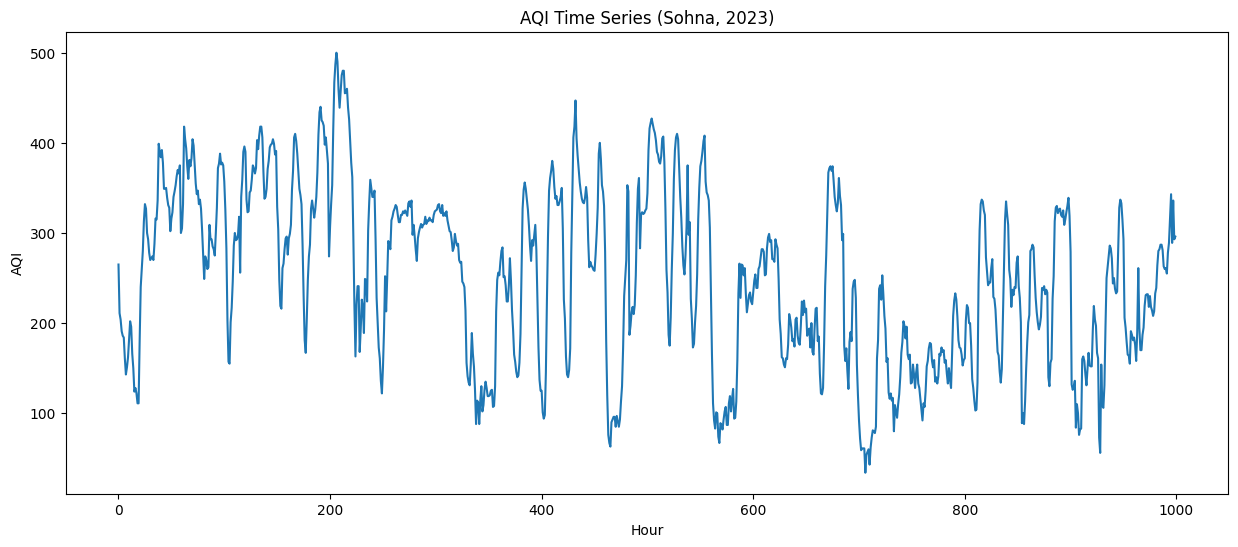

In [22]:
# Step 3: Visualize the AQI data
plt.figure(figsize=(15, 6))
plt.plot(aqi_series[:1000])  # Plot first 1000 hours for clarity
plt.title('AQI Time Series (Sohna, 2023)')
plt.xlabel('Hour')
plt.ylabel('AQI')
plt.show()

####**DATA PREPARATION FOR LSTM**

In [24]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
scaler = MinMaxScaler(feature_range=(0, 1))
aqi_scaled = scaler.fit_transform(aqi_series.reshape(-1, 1))

In [25]:
# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [26]:
# Parameters
sequence_length = 24  # Use past 24 hours to predict next hour
X, y = create_sequences(aqi_scaled, sequence_length)

In [27]:
# Split into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [28]:

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [30]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0239 - val_loss: 0.0050
Epoch 2/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0056 - val_loss: 0.0044
Epoch 3/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0044 - val_loss: 0.0033
Epoch 4/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 5/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 6/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 7/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 8/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 9/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 10/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0034 - val_loss: 0.0036
Epoch 11/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 12/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 

In [31]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [32]:
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test)

In [33]:
# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_inv, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, test_predict))
print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')

Train RMSE: 26.82
Test RMSE: 32.20


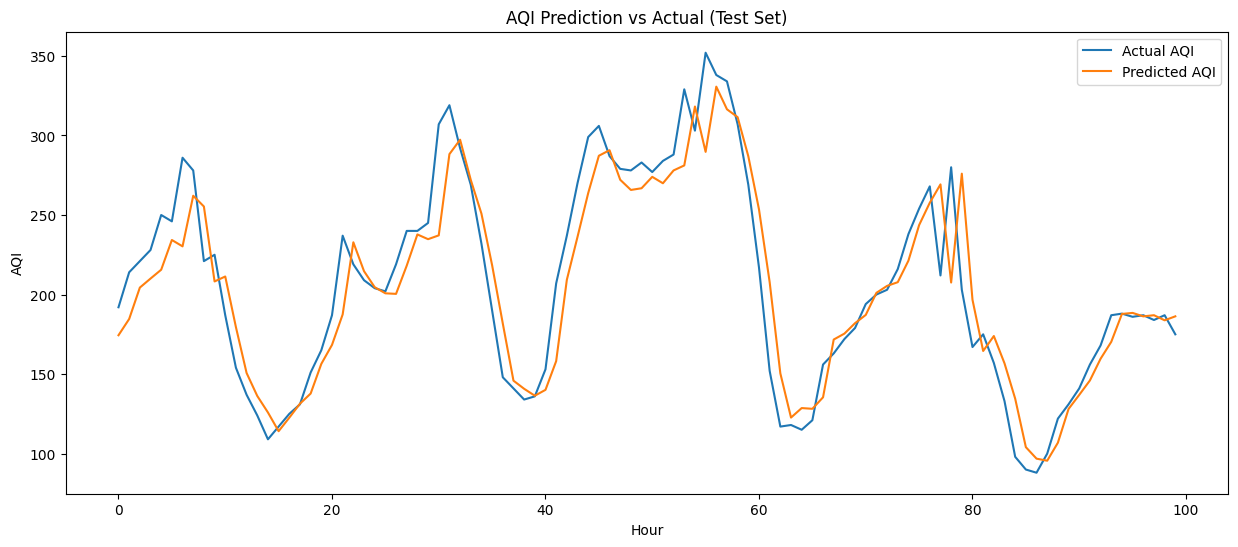

In [34]:
# Plot predictions
plt.figure(figsize=(15, 6))
plt.plot(y_test_inv[:100], label='Actual AQI')
plt.plot(test_predict[:100], label='Predicted AQI')
plt.title('AQI Prediction vs Actual (Test Set)')
plt.xlabel('Hour')
plt.ylabel('AQI')
plt.legend()
plt.show()

In [35]:
last_sequence = aqi_scaled[-sequence_length:].reshape((1, sequence_length, 1))
next_pred = model.predict(last_sequence)
next_pred = scaler.inverse_transform(next_pred)
print(f'Predicted AQI for next hour: {next_pred[0][0]:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Predicted AQI for next hour: 276.52
